In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("/home/jerrymark/data/Few-Shot-SUPERB/data/LibriMix/Libri2Mix/wav16k/min/metadata/metrics_train-100_mix_clean.csv")

In [3]:
df.source_1_SNR.abs().describe()

count    13900.000000
mean         2.912253
std          2.267019
min          0.000074
25%          1.173268
50%          2.481481
75%          4.204589
max         31.572564
Name: source_1_SNR, dtype: float64

<Axes: ylabel='Frequency'>

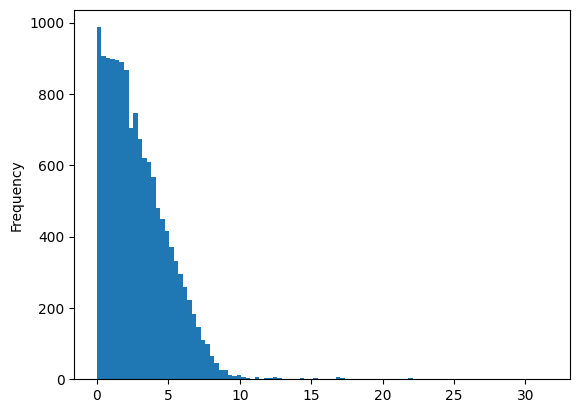

In [4]:
df.source_1_SNR.abs().plot.hist(bins=100)

In [5]:
df["SNR"] = df.source_1_SNR.abs()

In [6]:
labels = ['A', 'B', 'C', 'D', "E", ]
categories = pd.cut(df["SNR"], bins=[0, 5, 10, 15, 20, 25], labels=labels)

In [7]:
df["categories"] = categories


In [8]:
result_df = df.groupby("categories", group_keys=False).apply(lambda x: x.sample(x.shape[0]//100, random_state=8830))


In [9]:
import os
import shutil

exp_code = "train_1%-special"


In [10]:
os.makedirs(f"datasets/Libri2Mix/wav16k/min/{exp_code}", exist_ok=True)
os.makedirs(f"datasets/Libri2Mix/wav16k/min/{exp_code}/mix_clean", exist_ok=True)
os.makedirs(f"datasets/Libri2Mix/wav16k/min/{exp_code}/s1", exist_ok=True)
os.makedirs(f"datasets/Libri2Mix/wav16k/min/{exp_code}/s2", exist_ok=True)

In [11]:
result_df.head()

,mixture_ID,source_1_SNR,source_2_SNR,SNR,categories
7702,1034-121119-0086_1447-130552-0004,-4.436521,4.436520,4.436521,A
11810,4859-22176-0020_831-130739-0014,-0.686395,0.686394,0.686395,A
8302,1040-133433-0014_7859-102519-0011,-2.262314,2.262313,2.262314,A
6709,198-126831-0017_1355-39947-0069,-0.178510,0.178510,0.178510,A
8572,298-126791-0006_2159-179154-0005,-1.171738,1.171738,1.171738,A


In [12]:
spk2utt = result_df.mixture_ID.to_list()

In [13]:
with open(f"datasets/Libri2Mix/wav16k/min/{exp_code}/mix_clean/spk2utt", "w") as f:
    for line in spk2utt:
        f.write(line + "\n")

shutil.copy(f"datasets/Libri2Mix/wav16k/min/{exp_code}/mix_clean/spk2utt", f"datasets/Libri2Mix/wav16k/min/{exp_code}/mix_clean/utt2spk")
shutil.copy(f"datasets/Libri2Mix/wav16k/min/{exp_code}/mix_clean/spk2utt", f"datasets/Libri2Mix/wav16k/min/{exp_code}/s1/utt2spk")
shutil.copy(f"datasets/Libri2Mix/wav16k/min/{exp_code}/mix_clean/spk2utt", f"datasets/Libri2Mix/wav16k/min/{exp_code}/s1/spk2utt")
shutil.copy(f"datasets/Libri2Mix/wav16k/min/{exp_code}/mix_clean/spk2utt", f"datasets/Libri2Mix/wav16k/min/{exp_code}/s2/utt2spk")
shutil.copy(f"datasets/Libri2Mix/wav16k/min/{exp_code}/mix_clean/spk2utt", f"datasets/Libri2Mix/wav16k/min/{exp_code}/s2/spk2utt")

'datasets/Libri2Mix/wav16k/min/train_1%-special/s2/spk2utt'

In [14]:
with open(f"datasets/Libri2Mix/wav16k/min/{exp_code}/mix_clean/wav.scp", "w") as f:
    for line in spk2utt:
        f.write(f'{line} ../data/LibriMix/Libri2Mix//wav16k/min/train-100/mix_clean/{line}.wav\n')

with open(f"datasets/Libri2Mix/wav16k/min/{exp_code}/s1/wav.scp", "w") as f:
    for line in spk2utt:
        f.write(f'{line} ../data/LibriMix/Libri2Mix//wav16k/min/train-100/s1/{line}.wav\n')

with open(f"datasets/Libri2Mix/wav16k/min/{exp_code}/s2/wav.scp", "w") as f:
    for line in spk2utt:
        f.write(f'{line} ../data/LibriMix/Libri2Mix//wav16k/min/train-100/s2/{line}.wav\n')
